# Estimating statistical model parametes with maximum likelihood in R

As was covered in lecture there is a general recipe for estimating statistical model parameters in `Python`.

1. load data

2. write a custome likelihood function

3. estimate parameter values by minimizing the negative log likelihood

The code required to accomplish these steps on a simulated data set are below.

&nbsp;

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


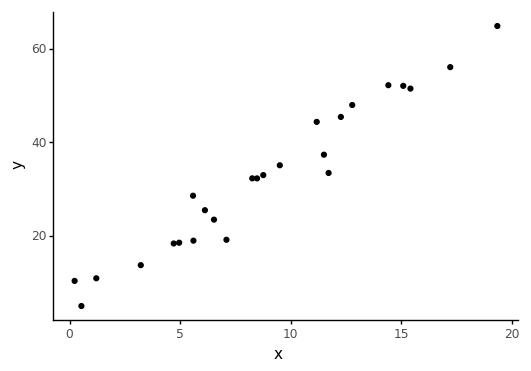

<ggplot: (297143721)>

In [1]:
### Import packages
import numpy
import pandas
from scipy.optimize import minimize
from scipy.stats import norm
from plotnine import *

### Simulating data
# creating a uniformly distributed set of values for an independent variable x
# and values for a variable y that is linearly dependent on x
N=25
x=numpy.random.uniform(0,20,size=N)
y=3*x+5

# add some "noise" to y and put the variables in a dataframe
y=y+numpy.random.randn(N)*3
df=pandas.DataFrame({'x':x,'y':y})

# plot our observations
ggplot(df,aes(x='x',y='y'))+geom_point()+theme_classic()

In [2]:
### Custom likelihood function
def nllike(p,obs):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    
    expected=B0+B1*obs.x
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll

### estimate parameters by minimizing the negative log likelihood
initialGuess=numpy.array([1,1,1])
fit=minimize(nllike,initialGuess,method="Nelder-Mead",options={'disp': True},args=df)

# fit is a variable that contains an OptimizeResult object
# attribute 'x' is a list of the most likely parameter values
print(fit.x)

Optimization terminated successfully.
         Current function value: 65.715476
         Iterations: 133
         Function evaluations: 231
[ 5.47260034  3.04434477  3.35240437]
